# Analyse du pouvoir d'achat des ouvriers anglais

Analyse proposée par Yannick Malot

Le 30/08/2024

Document computationnel

Parcours Jupyter / Sujet : Salaire des ouvriers anglais et prix du blé

## Importation des bibliothèques

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Importation des données

In [2]:
data_url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv"

In [3]:
raw_data = pd.read_csv(data_url, index_col="rownames")

In [4]:
raw_data.head()

Year  Wheat  Wages
rownames                    
1         1565   41.0   5.00
2         1570   45.0   5.05
3         1575   42.0   5.08
4         1580   49.0   5.12
5         1585   41.5   5.15

Vérifions s'il y a des données manquantes.

In [5]:
raw_data[raw_data.isna().any(axis=1)]

Year  Wheat  Wages
rownames                    
51        1815   78.0    NaN
52        1820   54.0    NaN
53        1821   54.0    NaN

On observe qu'il manque des données pour les salaires lors des années 1815, 1820 et 1821. Nous proposons de garder ces points de données tout de même. Cependant, nous enlèverons l'année 1821 qui n'apporte rien à l'analyse de plus que l'année 1820.

Regardons l'écart temporel qui sépare deux dates, pour être sûr qu'il est bien de 5 ans de partout.

In [6]:
year_diff = [raw_data["Year"].iloc[i+1] - raw_data["Year"].iloc[i] for i in range(len(raw_data)-1)]
unique_years = []
for year in year_diff:
    if year not in unique_years:
        unique_years.append(year)
count_year_diff = {year: sum([i == year for i in year_diff]) for year in unique_years}

In [7]:
count_year_diff

{5: 51, 1: 1}

On observe que toutes les dates sont espacées de 5 ans à l'exception d'une (la dernière) que nous avions de toute façon prévu d'enlever.

## Reproduction du grpahique de Playfair

Créons un objet ```DataFrame``` avec lequel nous allons travailler, et changeons la colonne qui sert d'index pour utiliser les années.

In [8]:
data = raw_data.copy().set_index("Year").drop(index=1821)

In [9]:
data.tail()

Wheat  Wages
Year              
1800   79.0   28.5
1805   81.0   29.5
1810   99.0   30.0
1815   78.0    NaN
1820   54.0    NaN

Voyons un aperçu des données. Pour commencer, reproduisons le grpahique de Playfair

Text(0.5,1,'Evolution des prix du blé et des salaires des ouvriers \n en Angleterre entre 1560 et 1820')

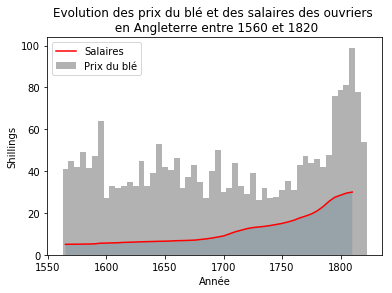

In [10]:
fig, ax = plt.subplots()

ax.plot(data.index, data["Wages"], label="Salaires", color="red")
ax.fill_between(data.index, data["Wages"], alpha=0.3)
ax.bar(data.index, data["Wheat"], width=5, color="grey", alpha=0.6, label="Prix du blé")
ax.legend()
ax.set_ylabel("Shillings")
ax.set_xlabel("Année")
ax.set_title("Evolution des prix du blé et des salaires des ouvriers \n en Angleterre entre 1560 et 1820")

## Amélioration du graphique de Playfair

Nous proposerons ici une amélioration du graphique de Playfair, en mettant tout d'abord chaque série de données sur un axe des ordonnées différent. Les salaires seront représentés sur l'axe de gauche, et les prix du blé, sur l'axe de droite. Nous proposons aussi de représenter les prix du blé sous une autre forme, en ajoutant à la fois un nuage de points et une ligne représentant une moyenne glissante sur 3 périodes. Nous utiliserons aussi des couleurs adaptées aux personnes différenciant mal les couleurs.

In [11]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [12]:
prices_ma = data["Wheat"].rolling(window=3).mean()

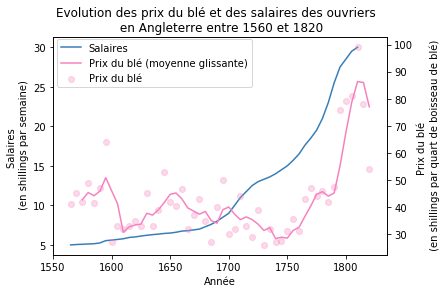

In [13]:
fig, ax1 = plt.subplots()

ax1.plot(
    data.index, 
    data["Wages"], 
    label="Salaires",
    color=CB_color_cycle[0]
)

ax1.set_ylabel("Salaires \n (en shillings par semaine)")
ax1.set_xlabel("Année")
ax1.set_title("Evolution des prix du blé et des salaires des ouvriers  \n en Angleterre entre 1560 et 1820")

ax2 = ax1.twinx()
ax2.scatter(
    data.index, 
    data["Wheat"], 
    color=CB_color_cycle[3], 
    alpha=0.3,
    label="Prix du blé"
)
ax2.plot(
    data.index,
    prices_ma,
    color=CB_color_cycle[3],
    label="Prix du blé (moyenne glissante)"
)
ax2.set_ylabel("Prix du blé \n (en shillings par quart de boisseau de blé)")
fig.legend(loc="upper left", bbox_to_anchor=(0.12, 0.9))

## Analyse de l'évolution du pouvoir d'achat des ouviers au cours du temps

Calculons le pouvoir d'achat des ouvriers, défini comme la quantité de blé (en boisseaux) qu'il est possible d'acheter avec une semaine de salaire.

In [14]:
purchasing_power = data["Wages"] / data["Wheat"] / 4

Text(0.5,1,"Evolution du pouvoir d'achat des ouvriers  \n en Angleterre entre 1560 et 1820")

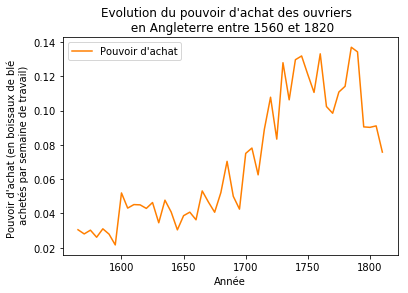

In [15]:
fig, ax = plt.subplots()
ax.plot(
    data.index,
    purchasing_power,
    label="Pouvoir d'achat",
    color=CB_color_cycle[1]
)
ax.legend()
ax.set_ylabel("Pouvoir d'achat (en boissaux de blé \n achetés par semaine de travail)")
ax.set_xlabel("Année")
ax.set_title("Evolution du pouvoir d'achat des ouvriers  \n en Angleterre entre 1560 et 1820")

Nous proposons ensuite une visualisation des salaires en fonction des prix du blé. L'année des données n'apparaît pas directement ici mais elle a été représentée de la façon suivante : plus un point est foncé, plus il représente une donnée récente. Nous représenterons de plus le pouvoir d'achat moyen sur la période par une ligne pointillée verte, et le puvoir d'achat en début de période par une ligne continue violette.

Text(0.5,1,'Corrélation entre salaires des ouvriers anglais \n et prix du blé entre 1565 et 1820')

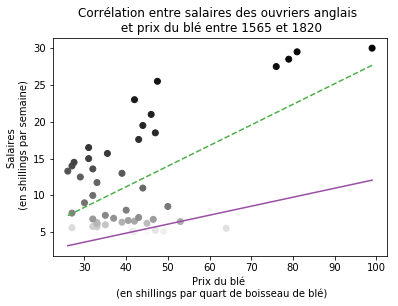

In [16]:
mean_pp = data["Wheat"].sort_values() * purchasing_power.mean() * 4
min_pp = data["Wheat"].sort_values() * purchasing_power.iloc[0] * 4

fig, ax = plt.subplots()
ax.scatter(
    data["Wheat"],
    data["Wages"],
    c=data.index,
    cmap='gray_r'
)
ax.plot(
    data["Wheat"].sort_values(),
    mean_pp,
    label="Mean purchasing power over the period",
    color=CB_color_cycle[2],
    linestyle="--"
)
ax.plot(
    data["Wheat"].sort_values(),
    min_pp,
    label="Purchasing power at the beginning of the period",
    color=CB_color_cycle[5],
)

ax.set_ylabel("Salaires \n (en shillings par semaine)")
ax.set_xlabel("Prix du blé \n (en shillings par quart de boisseau de blé)")
ax.set_title("Corrélation entre salaires des ouvriers anglais \n et prix du blé entre 1565 et 1820")

Sur les deux graphiques ci-dessus, nous voyons clairement que le pouvoir d'achat tel que nous l'avons défini a progressé sur la période considérée. Le premier graphique nous permet de voir une évolution à la hausse de la quantité de blé qu'il est possible d'acheter avec le fruit d'une semaine de travail. Le second graphique nous montre bien que toutes les années où le pouvoir d'achat est plus haut que sur l'ensemble de la période sont des années récentes, et les années plus anciennes correspondent bien à un pouvoir d'achat plus faible.